## Notebook to experiment with downloading imager data

@author Riley Troyer
science@rileytroyer.com

In [1]:
# Import needed libraries
from datetime import datetime
from dateutil import parser
import h5py
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import logging
import os
import sys

# Add root to path
path_root = Path('../../').resolve()
sys.path.append(str(path_root))

# Import functions to do downloading and processing
from src.data.themis_data_functions import download_themis_images, themis_asi_to_hdf5_8bit_clahe

# Import functions to do downloading and processing
from src.data.pfrr_data_functions import download_pfrr_images, pfrr_asi_to_hdf5_8bit_clahe

# Important directories
data_dir = '../../data/'

In [2]:
classification_dir = '../../docs/classifications/'

b20220901 = classification_dir + 'themis/classification-09092022 updated.xlsx'
b20221017 = classification_dir + 'themis/classification-10012022.xlsx'
b20221120 = classification_dir + 'themis/classification-11202022.xlsx'
b20230201 = classification_dir + 'themis/classification-02012023.xlsx'

strfiles = [b20220901, b20221017, b20221120, b20230201]

In [3]:
days_list = []
asis_list = []

# Read in classification csvs and combine into one full dataframe
for strfile in strfiles:

    classification_csv = pd.read_excel(strfile, sheet_name='themis')

    # Check format of date
    if type(classification_csv['Date'][0]) == str:
        days = [parser.isoparse(d) for d in classification_csv['Date']]

    else:
        days = [datetime(int(d[0:4]), int(d[4:6]), int(d[6:8]))
                for d in classification_csv['Date'].astype(str)]


    # Add days to master list
    days_list.extend(days)

    # Also extend asis
    asis_list.extend(list(classification_csv['camera']))

In [2]:
download_themis_images(datetime(2018, 3, 10), 'kapu', '../../data/raw/training/themis/')

In [2]:
themis_asi_to_hdf5_8bit_clahe(datetime(2018, 3, 10), 'kapu',
                                      save_dir='../../data/raw/training/themis/',
                                      h5_dir='../../data/interim/training/themis/')

In [5]:
download_themis_images(days_list[0], asis_list[0], '../../data/raw/training/themis/')

In [4]:
themis_asi_to_hdf5_8bit_clahe(days_list[0], asis_list[0],
                                      save_dir='../../data/raw/training/themis/',
                                      h5_dir='../../data/interim/training/themis/')

/venvs/ml-pa-classifications/lib/python3.9/site-packages/scipy/io/_idl.py:279: UserWarning: Not able to verify number of bytes from header
  warnings.warn("Not able to verify number of bytes from header")


Failed reading image data frame: cannot reshape array of size 27376 into shape (256,256,1)
Failed reading image data frame: cannot reshape array of size 52756 into shape (256,256,1)
Failed reading image data frame: cannot reshape array of size 53836 into shape (256,256,1)
Failed reading image data frame: cannot reshape array of size 54916 into shape (256,256,1)
Failed reading image data frame: cannot reshape array of size 41416 into shape (256,256,1)
Failed reading image data frame: cannot reshape array of size 54376 into shape (256,256,1)
Failed reading image data frame: cannot reshape array of size 54916 into shape (256,256,1)
Failed reading image data frame: cannot reshape array of size 50056 into shape (256,256,1)
Failed reading image data frame: cannot reshape array of size 6856 into shape (256,256,1)
Failed reading image data frame: cannot reshape array of size 53836 into shape (256,256,1)
Failed reading image data frame: cannot reshape array of size 51676 into shape (256,256,1)


In [3]:
# Check that h5 file data looks good

image_filenames = os.listdir('../../data/interim/training/themis/')

image_file = h5py.File('../../data/interim/training/themis/' + image_filenames[3])

In [26]:
import themis_imager_readfile
filename = '../../data/raw/training/themis/kapu/2018-03-10/ut00/20180310_0029_kapu_themis21_full.pgm.gz'
img, meta, problematic_files = themis_imager_readfile.read(filename)

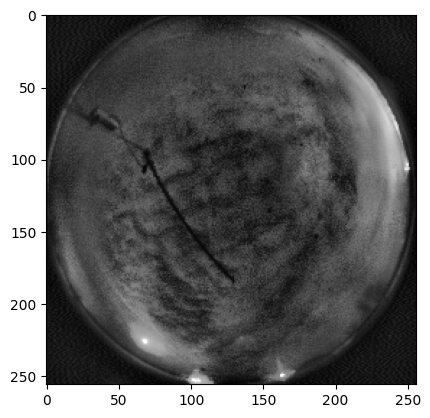

In [8]:
plt.imshow(image_file['images'][:, :, 10000], cmap='gray')

### Now do PFRRR

In [2]:
classification_dir = '../../docs/classifications/'

b1 = classification_dir + 'pfrr/New ML Batch 1 updated.xlsx'
b2 = classification_dir + 'pfrr/New ML Batch 2 updated.xlsx'

strfiles = [b1, b2]

In [3]:
days_list = []

logging.info('Reading in classification files.')

# Read in classification csvs and combine into one full dataframe
for strfile in strfiles:

    classification_csv = pd.read_excel(strfile, sheet_name='pfrr')

    days = [d.to_pydatetime() for d in classification_csv['Date']]

    # Add days to master list
    days_list.extend(days)

days_list = np.unique(days_list)

In [8]:
download_pfrr_images(days_list[0].date(), save_dir='../../data/raw/training/pfrr/',
                            wavelength='558', processes=25)

In [4]:
pfrr_asi_to_hdf5_8bit_clahe(days_list[0].date(), save_dir='../../data/raw/training/pfrr/',
                            h5_dir='../../data/interim/training/pfrr/',
                            wavelength='558', del_files=False, processes=4)

In [5]:
# Check that h5 file data looks good

image_filenames = os.listdir('../../data/interim/training/pfrr/')

image_file = h5py.File('../../data/interim/training/pfrr/' + image_filenames[0])

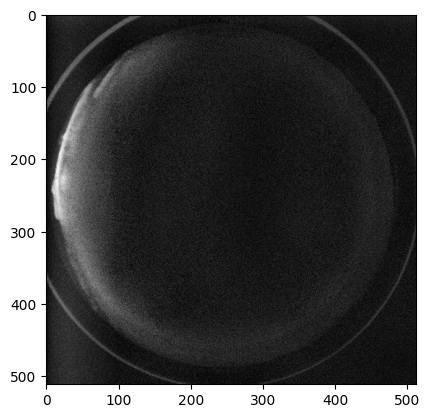

In [11]:
plt.imshow(image_file['images'][1000, :, :], cmap='gray')